In [109]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import re

In [44]:
loan_data = pd.read_csv("loan_data_2007_2014.csv")

In [45]:
loan_data.shape

(466285, 75)

In [46]:
loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## MAKING THE TARGET VARIABLE 

In [47]:
loan_data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [48]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charged Off','Default','Late (31-120 days)','Does not meet the credit policy. Status:Charged Off']),0,1)

In [49]:
loan_data['good_bad'].value_counts()

1    415317
0     50968
Name: good_bad, dtype: int64

In [50]:
loan_data = loan_data.drop('loan_status',axis=1)

## TRAIN TEST SPLIT 

In [51]:
loan_data = loan_data.sample(frac=1).reset_index(drop=True)

In [52]:
loan_data.shape

(466285, 75)

In [69]:
train_loan_data = loan_data.iloc[:400000,:].copy()
test_loan_data = loan_data.iloc[400000:,:].copy()

In [70]:
train_loan_data.shape

(400000, 75)

In [71]:
test_loan_data.shape

(66285, 75)

## CLEANING AND PREPROCESSING 

In [72]:
train_loan_data['good_bad'].value_counts()

1    356238
0     43762
Name: good_bad, dtype: int64

In [73]:
train_loan_data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,good_bad
0,393371,15691423,17783813,2700,2700,2700.0,36 months,12.99,90.97,C,C1,Neuroimaging Analyst,2 years,RENT,37000.0,Not Verified,May-14,n,https://www.lendingclub.com/browse/loanDetail....,NaN,other,Other,372xx,TN,13.53,0.0,Mar-01,1.0,NaN,NaN,7.0,0.0,2481,19.5,13.0,f,1329.52,1329.52,1819.40,1819.40,1370.48,448.92,0.0,0.0,0.0,Jan-16,90.97,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,33933.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12700.0,NaN,NaN,NaN,1
1,373342,17595779,19728226,14300,14300,14300.0,60 months,20.20,380.46,E,E3,Manager,7 years,RENT,110000.0,Source Verified,Jun-14,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,908xx,CA,4.39,1.0,Jul-99,1.0,13.0,NaN,7.0,0.0,11771,47.7,20.0,w,0.00,0.00,760.92,760.92,281.84,479.08,0.0,0.0,0.0,Aug-14,380.46,NaN,Jan-16,0.0,13.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,13948.0,11771.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26700.0,NaN,NaN,NaN,0
2,372801,18505434,20668100,35000,35000,35000.0,36 months,14.49,1204.57,C,C4,case management coordinator,10+ years,MORTGAGE,90000.0,Verified,Jun-14,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,773xx,TX,21.48,3.0,Feb-94,0.0,13.0,NaN,9.0,0.0,12310,75.1,36.0,w,18412.45,18412.45,22886.83,22886.83,16587.55,6299.28,0.0,0.0,0.0,Jan-16,1204.57,Feb-16,Jan-16,0.0,13.0,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,181473.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16400.0,NaN,NaN,NaN,1
3,55058,9196379,11058430,20000,20000,20000.0,60 months,15.10,476.85,C,C2,Long Term Contract Paralegal,< 1 year,RENT,50000.0,Source Verified,Dec-13,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Consolidation Loan,902xx,CA,22.17,0.0,May-98,1.0,27.0,NaN,7.0,0.0,7363,54.1,16.0,f,13738.31,13738.31,11440.28,11440.28,6261.69,5178.59,0.0,0.0,0.0,Dec-15,476.85,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,25705.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13600.0,NaN,NaN,NaN,1
4,134732,5414725,6786884,5000,5000,5000.0,36 months,18.75,182.65,D,D3,Baylor University Medical Center,10+ years,RENT,92892.8,Verified,May-13,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,Inventory Acquistion,752xx,TX,28.15,0.0,Dec-89,0.0,48.0,NaN,7.0,0.0,62272,96.1,12.0,f,872.77,872.77,5660.71,5660.71,4127.23,1533.48,0.0,0.0,0.0,Jan-16,182.65,Jan-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,70804.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64788.0,NaN,NaN,NaN,1


In [74]:
train_loan_data.isna().sum()

Unnamed: 0                          0
id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       23674
emp_length                      18028
home_ownership                      0
annual_inc                          4
verification_status                 0
issue_d                             0
pymnt_plan                          0
url                                 0
desc                           292011
purpose                             0
title                              18
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        26
earliest_cr_

In [75]:
train_loan_data['term'] = train_loan_data['term'].apply(lambda x: re.search(r'\d+', x)[0])

In [77]:
train_loan_data['emp_length'] = np.where(train_loan_data['emp_length'].isna(),'0',train_loan_data['emp_length'])
train_loan_data['emp_length'] = np.where(train_loan_data['emp_length']=='< 1 year','0',train_loan_data['emp_length'])
train_loan_data['emp_length'] = train_loan_data['emp_length'].apply(lambda x: re.search(r'\d+',x)[0])

In [82]:
train_loan_data['issue_d'] = pd.to_datetime(train_loan_data['issue_d'],format='%b-%y')
train_loan_data['months_since_issue_d'] = round((pd.to_datetime('2017-12-01') - train_loan_data['issue_d'])/np.timedelta64(1,'M'),0)

In [86]:
train_loan_data['earliest_cr_line'] = pd.to_datetime(train_loan_data['earliest_cr_line'],format='%b-%y')
train_loan_data['months_since_ear_cr_line'] = round((pd.to_datetime('2017-12-01') - train_loan_data['earliest_cr_line'])/np.timedelta64(1,'M'),0)

In [127]:
def woe_discrete(df,indep_var,dep_var):
    df = df[[indep_var,dep_var]]
    df = pd.concat([df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0],as_index=False)[df.columns.values[1]].mean()], axis=1)
    df = df.iloc[:,[0,1,3]]
    df.columns = [indep_var,'n_obs','prop_good']
    df['prop_bad'] = 1 - df['prop_good']
    df['n_obs_good'] = df['n_obs'] * df ['prop_good']
    df['n_obs_bad'] = df['n_obs'] * df['prop_bad']
    df['woe'] = np.log(df['n_obs_good']/df['n_obs_bad'])
    df = df.sort_values('woe').reset_index(drop=True)
    df['IV'] = (df['prop_good'] - df['prop_bad']) * df['woe']
    df['IV'] = df['IV'].sum()
    
    return df

In [128]:
def plot_woe(df):
    plt.figure(figsize=(18,8))
    plt.plot(df.iloc[:,0],df.loc[:,'woe'],marker='o')
    plt.xlabel(df.columns.values[0])
    plt.ylabel('WOE')
    plt.title('WOE by '+str(df.columns.values[0]))

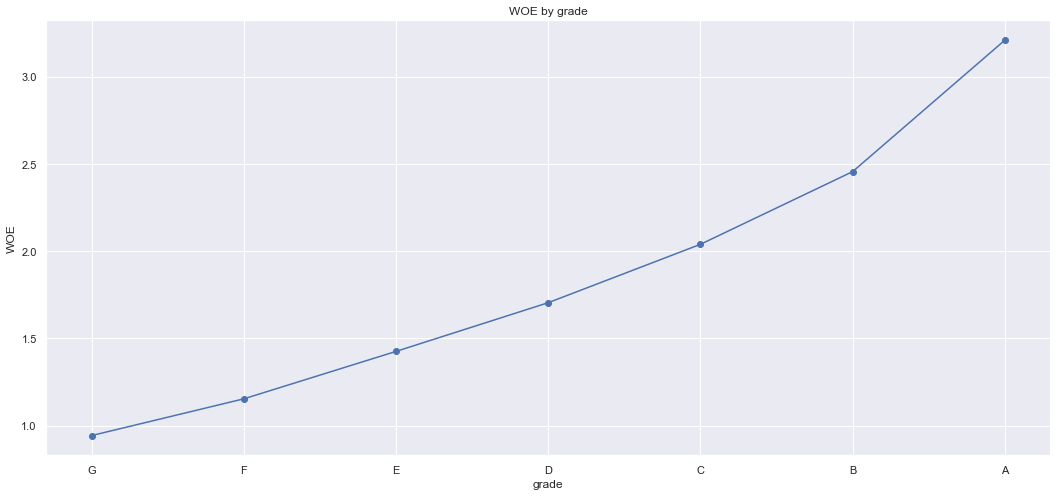

In [114]:
plot_woe(woe_discrete(train_loan_data,'grade','good_bad'))

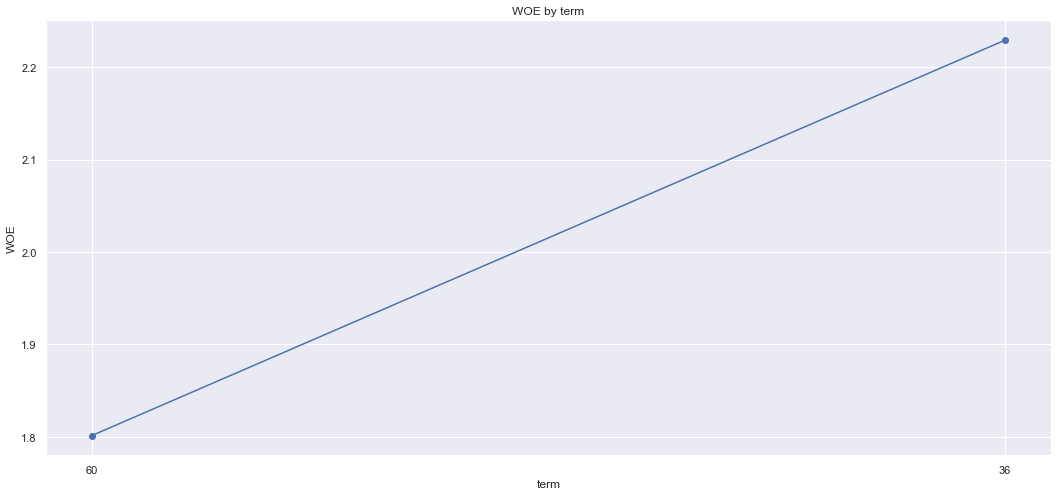

In [115]:
plot_woe(woe_discrete(train_loan_data,'term','good_bad'))

In [124]:
pd.get_dummies(train_loan_data[['addr_state']],prefix='addr_state',prefix_sep=':').columns

Index(['addr_state:AK', 'addr_state:AL', 'addr_state:AR', 'addr_state:AZ',
       'addr_state:CA', 'addr_state:CO', 'addr_state:CT', 'addr_state:DC',
       'addr_state:DE', 'addr_state:FL', 'addr_state:GA', 'addr_state:HI',
       'addr_state:IA', 'addr_state:ID', 'addr_state:IL', 'addr_state:IN',
       'addr_state:KS', 'addr_state:KY', 'addr_state:LA', 'addr_state:MA',
       'addr_state:MD', 'addr_state:ME', 'addr_state:MI', 'addr_state:MN',
       'addr_state:MO', 'addr_state:MS', 'addr_state:MT', 'addr_state:NC',
       'addr_state:NE', 'addr_state:NH', 'addr_state:NJ', 'addr_state:NM',
       'addr_state:NV', 'addr_state:NY', 'addr_state:OH', 'addr_state:OK',
       'addr_state:OR', 'addr_state:PA', 'addr_state:RI', 'addr_state:SC',
       'addr_state:SD', 'addr_state:TN', 'addr_state:TX', 'addr_state:UT',
       'addr_state:VA', 'addr_state:VT', 'addr_state:WA', 'addr_state:WI',
       'addr_state:WV', 'addr_state:WY'],
      dtype='object')

In [118]:
woe_discrete(train_loan_data,'home_ownership','good_bad')

,home_ownership,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
3,OTHER,155,0.806452,0.193548,125.0,30.0,1.427116,inf
5,RENT,161905,0.873370,0.126630,141403.0,20502.0,1.931092,inf
2,NONE,44,0.886364,0.113636,39.0,5.0,2.054124,inf
4,OWN,35688,0.892345,0.107655,31846.0,3842.0,2.114919,inf
1,MORTGAGE,202207,0.904143,0.095857,182824.0,19383.0,2.244128,inf
0,ANY,1,1.000000,0.000000,1.0,0.0,inf,inf


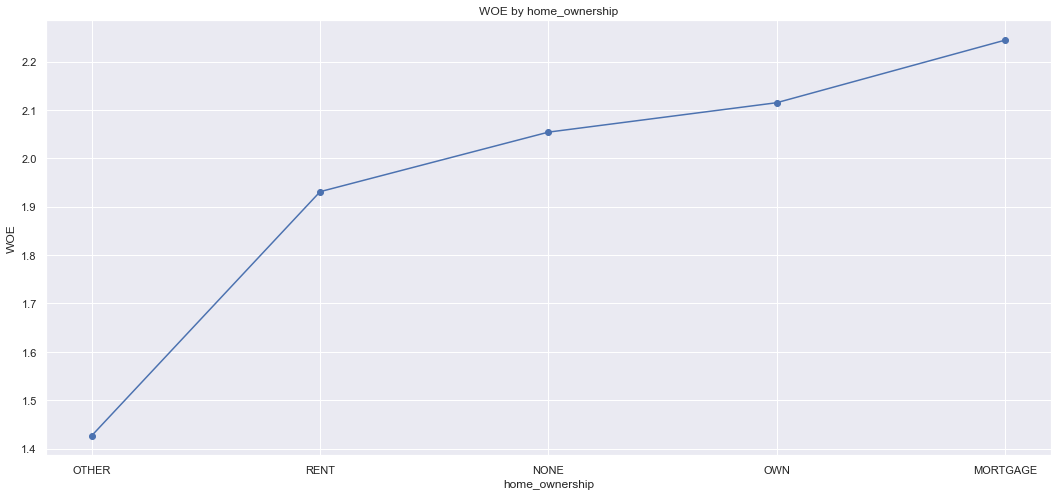

In [117]:
plot_woe(woe_discrete(train_loan_data,'home_ownership','good_bad'))

In [129]:
woe_discrete(train_loan_data,'addr_state','good_bad')

,addr_state,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
0,NE,10,0.400000,0.600000,4.0,6.0,-0.405465,inf
1,IA,12,0.750000,0.250000,9.0,3.0,1.098612,inf
2,NV,5600,0.862679,0.137321,4831.0,769.0,1.837718,inf
3,FL,27016,0.874519,0.125481,23626.0,3390.0,1.941518,inf
4,AL,4994,0.875451,0.124549,4372.0,622.0,1.950036,inf
5,HI,2122,0.877474,0.122526,1862.0,260.0,1.968725,inf
6,LA,4732,0.881445,0.118555,4171.0,561.0,2.006190,inf
7,NM,2214,0.882114,0.117886,1953.0,261.0,2.012602,inf
8,NY,34472,0.882397,0.117603,30418.0,4054.0,2.015330,inf
9,NC,10862,0.883539,0.116461,9597.0,1265.0,2.026378,inf


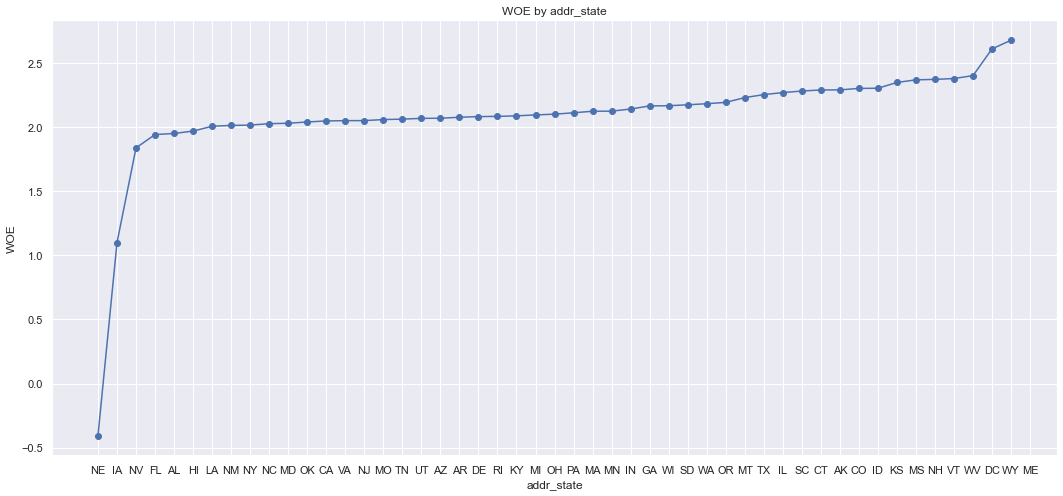

In [126]:
plot_woe(woe_discrete(train_loan_data,'addr_state','good_bad'))

In [132]:
woe_discrete(train_loan_data,'addr_state','good_bad').iloc[2:42,:]

,addr_state,n_obs,prop_good,prop_bad,n_obs_good,n_obs_bad,woe,IV
2,NV,5600,0.862679,0.137321,4831.0,769.0,1.837718,inf
3,FL,27016,0.874519,0.125481,23626.0,3390.0,1.941518,inf
4,AL,4994,0.875451,0.124549,4372.0,622.0,1.950036,inf
5,HI,2122,0.877474,0.122526,1862.0,260.0,1.968725,inf
6,LA,4732,0.881445,0.118555,4171.0,561.0,2.006190,inf
7,NM,2214,0.882114,0.117886,1953.0,261.0,2.012602,inf
8,NY,34472,0.882397,0.117603,30418.0,4054.0,2.015330,inf
9,NC,10862,0.883539,0.116461,9597.0,1265.0,2.026378,inf
10,MD,9429,0.883869,0.116131,8334.0,1095.0,2.029589,inf
11,OK,3510,0.884900,0.115100,3106.0,404.0,2.039676,inf


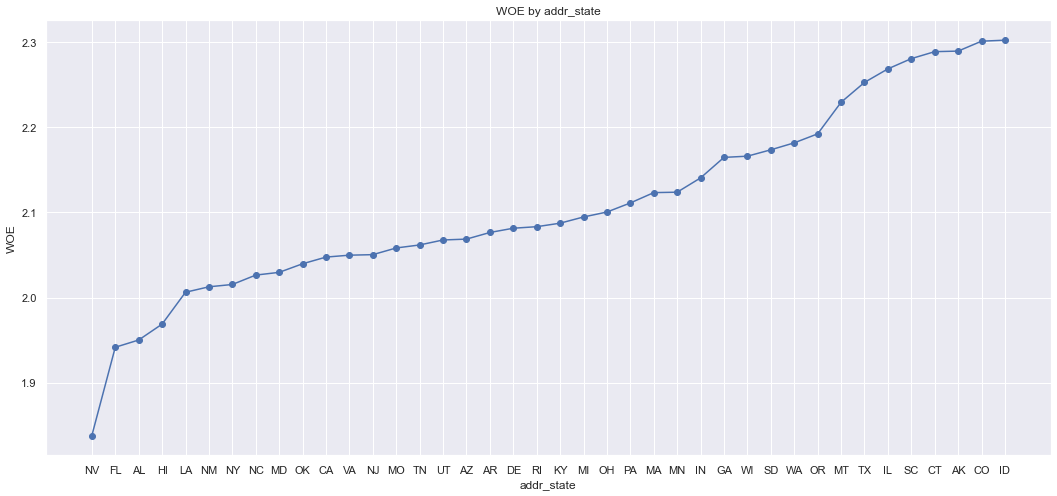

In [133]:
plot_woe(woe_discrete(train_loan_data,'addr_state','good_bad').iloc[2:42,:])

NE, IA,NV into one<br>
KS, MS, NH, VT, WV,DC,WY,ME into one<br>
FL separate<br>
AL,HI,LA,NM into one <br>
NY separate<br>
NC,MD,OK into one<br>
CA separate<br>
VA,NJ,MO,TN,UT,AZ,AR,DE,RI,KY,MI into one<br>
OH,PA,MA,MN,IN,GA,WI,SD,WA,OR,MT into one <br>
TX separate<br>
IL,SC,CT,AK,CO,ID into one<br>

In [137]:
grade_df = pd.get_dummies(train_loan_data['grade'],prefix='grade',prefix_sep=':')
grade_df = grade_df.drop('grade:G',axis=1)

In [141]:
term_df = pd.get_dummies(train_loan_data['term'],prefix='term',prefix_sep=':')
term_df = term_df.drop('term:60',axis=1)

In [154]:
home_ownership_df = pd.get_dummies(train_loan_data['home_ownership'],prefix='home_ownership',prefix_sep=':')
home_ownership_df['home_ownership:RENT_ANY_OTHER_NONE'] = home_ownership_df['home_ownership:RENT'] + \
                                                          home_ownership_df['home_ownership:ANY'] + \
                                                          home_ownership_df['home_ownership:OTHER'] + \
                                                          home_ownership_df['home_ownership:NONE']
home_ownership_df = home_ownership_df.drop(['home_ownership:RENT_ANY_OTHER_NONE','home_ownership:RENT','home_ownership:ANY','home_ownership:NONE','home_ownership:OTHER'],axis=1)

NE, IA,NV into one<br>
KS, MS, NH, VT, WV,DC,WY,ME into one<br>
FL separate<br>
AL,HI,LA,NM into one <br>
NY separate<br>
NC,MD,OK into one<br>
CA separate<br>
VA,NJ,MO,TN,UT,AZ,AR,DE,RI,KY,MI into one<br>
OH,PA,MA,MN,IN,GA,WI,SD,WA,OR,MT into one <br>
TX separate<br>
IL,SC,CT,AK,CO,ID into one<br>

In [161]:
addr_state_df = pd.get_dummies(train_loan_data['addr_state'],prefix='addr_state',prefix_sep=':')
addr_state_df['addr_state:NE_IA_NV'] = addr_state_df['addr_state:NE'] + addr_state_df['addr_state:IA']+addr_state_df['addr_state:NV'] 
addr_state_df['addr_state:KS_MS_NH_VT_WV_DC_WY_ME'] = addr_state_df['addr_state:KS'] + \
                                                    addr_state_df['addr_state:MS'] + \
                                                    addr_state_df['addr_state:NH'] + \
                                                    addr_state_df['addr_state:VT'] + \
                                                    addr_state_df['addr_state:WV'] + \
                                                    addr_state_df['addr_state:DC'] + \
                                                    addr_state_df['addr_state:WY'] + \
                                                    addr_state_df['addr_state:ME']
addr_state_df['addr_state:AL_HI_LA_NM'] = addr_state_df['addr_state:AL'] + \
                                        addr_state_df['addr_state:HI'] + \
                                        addr_state_df['addr_state:LA'] + \
                                        addr_state_df['addr_state:NM']
addr_state_df['addr_state:NC_MD_OK'] = addr_state_df['addr_state:NC'] + \
                                    addr_state_df['addr_state:MD'] + \
                                    addr_state_df['addr_state:OK']
addr_state_df['addr_state:VA_NJ_MO_TN_UT_AZ_AR_DE_RI_KY_MI'] = addr_state_df['addr_state:VA'] +\
                                                            addr_state_df['addr_state:NJ'] +\
                                                            addr_state_df['addr_state:MO'] +\
                                                            addr_state_df['addr_state:TN'] +\
                                                            addr_state_df['addr_state:UT'] +\
                                                            addr_state_df['addr_state:AZ'] +\
                                                            addr_state_df['addr_state:AR'] +\
                                                            addr_state_df['addr_state:DE'] +\
                                                            addr_state_df['addr_state:RI'] +\
                                                            addr_state_df['addr_state:KY'] +\
                                                            addr_state_df['addr_state:MI']
addr_state_df['addr_state:OH_PA_MA_MN_IN_GA_WI_SD_WA_OR_MT'] = addr_state_df['addr_state:OH'] +\
                                                            addr_state_df['addr_state:PA'] +\
                                                            addr_state_df['addr_state:MA'] +\
                                                            addr_state_df['addr_state:MN'] +\
                                                            addr_state_df['addr_state:IN'] +\
                                                            addr_state_df['addr_state:GA'] +\
                                                            addr_state_df['addr_state:WI'] +\
                                                            addr_state_df['addr_state:SD'] +\
                                                            addr_state_df['addr_state:WA'] +\
                                                            addr_state_df['addr_state:OR'] +\
                                                            addr_state_df['addr_state:MT']
addr_state_df['addr_state:IL_SC_CT_AK_CO_ID'] = addr_state_df['addr_state:IL'] +\
                                                addr_state_df['addr_state:SC'] +\
                                                addr_state_df['addr_state:CT'] +\
                                                addr_state_df['addr_state:AK'] +\
                                                addr_state_df['addr_state:CO'] +\
                                                addr_state_df['addr_state:ID']

addr_state_df = addr_state_df[['addr_state:KS_MS_NH_VT_WV_DC_WY_ME','addr_state:FL','addr_state:AL_HI_LA_NM',
                              'addr_state:NY','addr_state:NC_MD_OK','addr_state:CA','addr_state:VA_NJ_MO_TN_UT_AZ_AR_DE_RI_KY_MI',
                              'addr_state:OH_PA_MA_MN_IN_GA_WI_SD_WA_OR_MT','addr_state:TX','addr_state:IL_SC_CT_AK_CO_ID']]

In [166]:
train_loan_data_discrete = pd.concat([grade_df,term_df,home_ownership_df,addr_state_df],axis=1)

In [167]:
train_loan_data_discrete.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,term:36,home_ownership:MORTGAGE,home_ownership:OWN,addr_state:KS_MS_NH_VT_WV_DC_WY_ME,addr_state:FL,addr_state:AL_HI_LA_NM,addr_state:NY,addr_state:NC_MD_OK,addr_state:CA,addr_state:VA_NJ_MO_TN_UT_AZ_AR_DE_RI_KY_MI,addr_state:OH_PA_MA_MN_IN_GA_WI_SD_WA_OR_MT,addr_state:TX,addr_state:IL_SC_CT_AK_CO_ID
0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [168]:
train_loan_data_discrete.shape

(400000, 19)